In [384]:
import numpy as np

class MyRegressor:
    def __init__(self) -> None:
        self.W = []
        self.X = []

    def get_parameters(self):
        return self.W
    
    def predict(self,x):
        l = []
        for i in range(len(x)):
            c = self.W[0][-1]
            for j in range(len(x[i])):
                c += float(self.W[j+1][-1]) * x[i][j]
            l.append(c)
        return l

    def train(self, training_input_set, training_output_set):
        self.X = [[1] + x.copy() for x in training_input_set]
        XT = self.__transpose_matrix(self.X)
        P = self.__product(XT,self.X)
        P_Invers = self.__inversa(P)
        A = self.__product(P_Invers,XT)
        Y = [[el] for el in training_output_set.copy()]
        self.W = self.__product(A,Y)
        
        
    def __transpose_matrix(self, A):
        n, m = len(A), len(A[-1])
        XT = [[] for _ in range(m)]
        for i in range(n):
            for j in range(m):
                XT[j].append(A[i][j])
        return XT

    def __product(self,A,B):
        nr_lines = len(A)
        nr_cols = len(B[-1])
        prod = []
        for i in range(nr_lines):
            prod.append([])
            for j in range(nr_cols):
                prod[i].append(sum([A[i][k] * B[k][j] for k in range(len(A[i]))]))
        return prod          

    def __elimLinCol(self, A, i:int, j:int):
        B  = [ A[k].copy() for k in range(len(A)) if k != i ]
        for line in B:
            line.pop(j)
        return B

    def __determinant(self, A):
        if len(A) == 1:
            return A[-1][-1]
        return sum(((-1) ** j) * A[0][j] * self.__determinant(self.__elimLinCol(A,0,j)) for j in range(len(A[0])))

    def __inversa(self, A):
        dA = self.__determinant(A)
        B = []
        nr_lines = len(A)
        nr_cols = len(A[-1])
        for i in range(nr_lines):
            B.append([])
            for j in range(nr_cols):
                B[i].append(((-1) ** (i+j)) * self.__determinant(self.__elimLinCol(A,i,j))/dA)
        return B



## Happiness and GDP

In [385]:
import pandas as pd
import numpy as np

In [386]:
def getTrainingAndValidationSets(df_world_happiness):
        dataSize = df_world_happiness.shape[0]
        trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
        validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

        trainingInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet ]
        trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

        validationInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet ]
        validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
        
        return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

In [387]:
world_happiness = pd.read_csv("datas/v1_world-happiness-report-2017.csv",delimiter=',', header='infer')

In [388]:
import matplotlib.pyplot as plt

def plotRegressor(regressor, training_input_set, training_output_set):
    w0, w1 = regressor.get_parameters()[0][-1], regressor.get_parameters()[1][-1]
    noOfPoints = 1000
    xref = []
    val = min(training_input_set)
    step = (max(training_input_set) - min(training_input_set)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(training_input_set, training_output_set, 'ro', label = 'training data')  
    axes.plot(xref, yref, 'b-', label = 'learnt model')
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()

In [389]:
def happinessByGDP():
    regressor = MyRegressor()
    training_input_set, training_output_set, validation_input_set, validation_output_set = getTrainingAndValidationSets(world_happiness)

    training_input_set1 = [[el] for el in training_input_set]
    regressor.train(training_input_set1, training_output_set)

    #Regressor
    W = regressor.get_parameters()
    print("f(x) = {} + {}*x".format(W[0][-1],W[1][-1]))

    # Eroare
    computedValidationOutputs = regressor.predict([[x] for x in validation_input_set])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validation_output_set):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validation_output_set)
    print("Eroare: {}".format(manualError))

    plotRegressor(regressor, training_input_set, training_output_set)

f(x) = 3.233774925376282 + 2.1584422473584266*x
Eroare: 0.4395957983949388


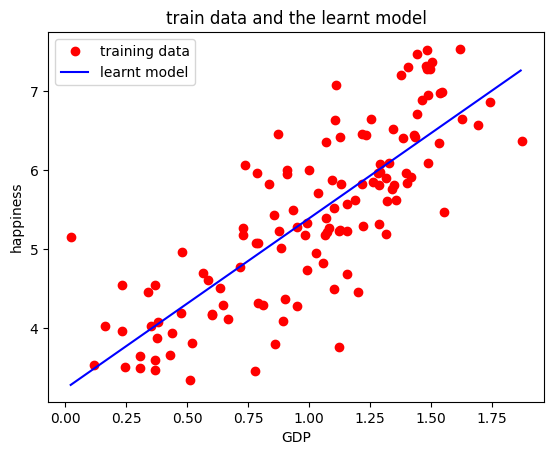

In [390]:
happinessByGDP()

## Happiness by GDP and Freedom

In [391]:
def getTrainingAndValidationSets2(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [[df_world_happiness["Economy..GDP.per.Capita."].iloc[index],df_world_happiness["Freedom"].iloc[index]] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [[df_world_happiness["Economy..GDP.per.Capita."].iloc[index],df_world_happiness["Freedom"].iloc[index]] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

In [392]:
def plotRegressor2(regressor, training_input_set, training_output_set):
    w0, w1, w2 = regressor.get_parameters()[0][-1],regressor.get_parameters()[1][-1],regressor.get_parameters()[2][-1]
    noOfPoints = 1000
    xref = []
    gdp = [point[0] for point in training_input_set]
    freedom = [point[1] for point in training_input_set]
    valGDP = min(gdp)
    valFreedom = min(freedom)
    stepGDP = (max(gdp) - min(gdp)) / noOfPoints
    stepFreedom = (max(freedom) - min(freedom)) / noOfPoints
    for _ in range(1, noOfPoints):
        xref.append((valGDP,valFreedom))
        valGDP += stepGDP
        valFreedom += stepFreedom
    yref = [w0 + w1 * el[0] + w2 * el[1] for el in xref] 

    axes  = plt.figure().add_subplot(projection='3d')

    axes.scatter(gdp,freedom,training_output_set)
    axes.plot([x[0] for x in xref],[x[1] for x in xref], yref,'red')
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    plt.show()

In [393]:
def happinessByGDPAndFreedom():
    training_input_set, training_output_set, validation_input_set, validation_output_set = getTrainingAndValidationSets2(world_happiness)
    regressor = MyRegressor()
    regressor.train(training_input_set, training_output_set)

    W = regressor.get_parameters()
    print("f(x) = {} + {}*x1+ {}*x2".format(W[0][-1],W[1][-1],W[2][-1]))

    # Eroare
    computedValidationOutputs = regressor.predict([x for x in validation_input_set])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validation_output_set):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validation_output_set)
    print("Eroare: {}".format(manualError))

    plotRegressor2(regressor,training_input_set, training_output_set)



f(x) = 2.5790695688479945 + 1.8716906922824759*x1+ 2.2741614669143466*x2
Eroare: 0.4199760608155912


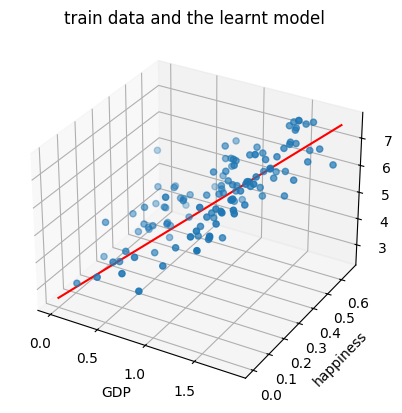

In [394]:
happinessByGDPAndFreedom()